<a href="https://colab.research.google.com/github/Sherrif-Isam/Machine-Learning--Insurance-Charge/blob/main/insurance_premium_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
medical_charges_url = " https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"


In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7908dd5be450>)

In [5]:
##We can now downoad the Panads dataframe to visualise the data
## to install panda without seeing the process - do : !pip install pandas --quite (but I already have pandas)

In [6]:
import pandas as pd

In [7]:
medical_df = pd.read_csv('medical.csv')

In [8]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
#Check the data type for each column and number of null values
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
## lets lookat some statistics
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Explotary Data Analysis
Lets visualise the distributions of some columns , and the relationship between charges between "charges" and other cloumns

In [11]:
!pip install plotly matplotlib seaborn --quiet

In [12]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#"%matplotlib inline: ensures all the plots show injupiter notebook and not as pop ups, because when you close a pop up the chart goes away"

The following will improve the dfault style and font size of our charts

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Now we want to visualise the distribution of age using a gistogram - we want to see how many cutomers we have from each age group . Maximum age is 64 and minimum age is 18. So we need 64 -18 + 1 binns ,one bin for each year.
The box pot is also usefull because it tells you the minimum,the maximum, the median and the quartiles, that can give you the sense of the distribution where the 50% point lies .And using plotly we can create both of these charts

In [14]:
fig = px.histogram(medical_df,
                   x= 'age',
                   marginal = 'box', # plotly will use this to plot a box plot
                   nbins = 47,
                   title = 'Distribution of Age',
)
fig.update_layout(bargap = 0.1)
fig.show()

You can see the distribution of age is almost uniformexcept for the ages 18 to 20.Maybe the insurance company is giving less insurance premiums to people in this age group

Let looks at the distribution of Body Mass Index (BMI) using a histogram and a box plot


In [15]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal = 'box',
                   color_discrete_sequence=['red'],
                   title  = 'Distriution of Body Mass Index - BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal = 'box',
                   color = 'smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title  = 'Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Smoker
Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [17]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [18]:
px.histogram(medical_df,x='smoker', color ='sex', title ='smoker')

Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [19]:
fig =px.scatter(medical_df,
                x= 'age',
                y='charges',
                color='smoker',
                opacity = 0.8,
                hover_data=['sex'],
                title = 'Age Vs. Charges')
fig.update_traces(marker_size= 5)
fig.show()

In [20]:
fig =px.scatter(medical_df,
                x= 'bmi',
                y='charges',
                color='smoker',
                opacity = 0.8,
                hover_data=['sex'],
                title = 'BMI Vs. Charges')
fig.update_traces(marker_size= 5)
fig.show()

In [21]:
px.violin(medical_df, x='children', y = 'charges')

Check Correlation :Whether or not 2 varaiables grow together

In [22]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [23]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

To compute correlation between categoical values it must first be convert to numerical values

In [24]:
smoker_values ={'no':0 , 'yes':1}
smoker_numeric= medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [25]:
medical_df2 =medical_df[['age','bmi','children','charges']]
#medical_df2
medical_df2.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


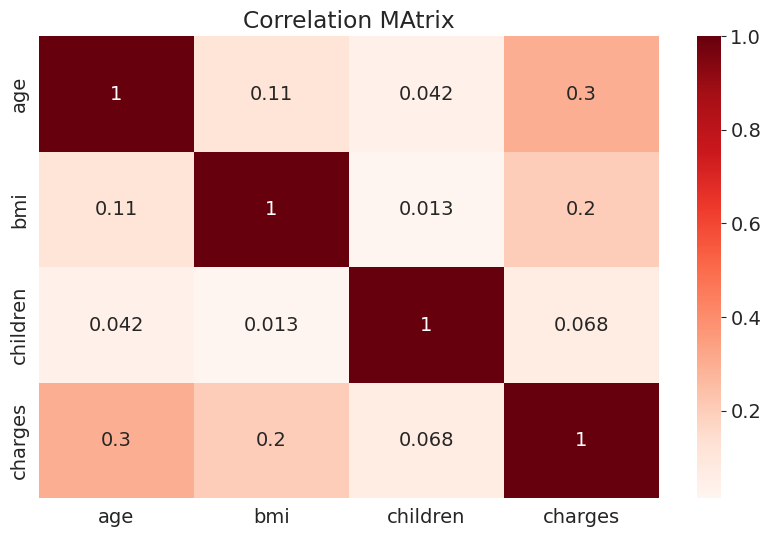

In [26]:
sns.heatmap(medical_df2.corr(), cmap='Reds', annot = True)
plt.title('Correlation MAtrix');

Linear Regression

In [27]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


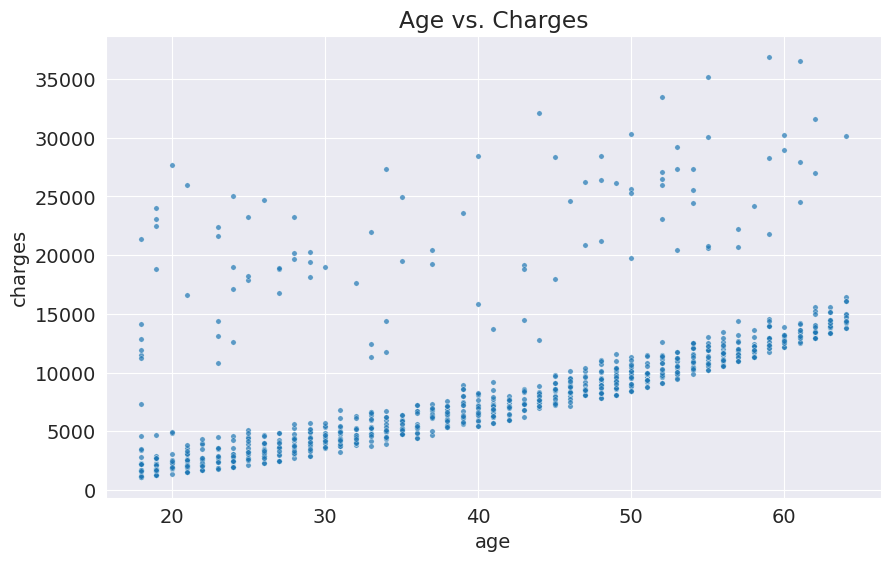

In [28]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [29]:
def estimate_charges (age, w, b):
  return w* age + b

In [30]:
w = 50
b = 100
estimate_charges(40,w,b)

2100

In [31]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages,w,b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


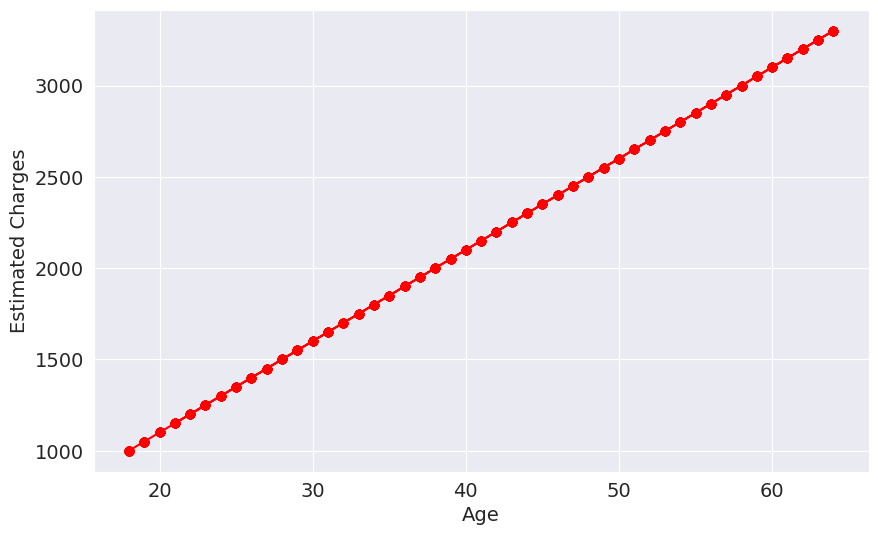

In [32]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

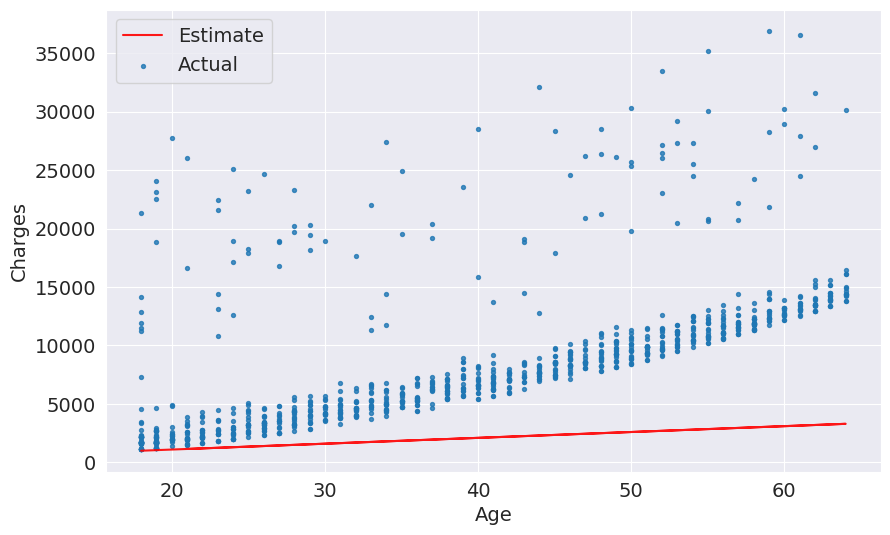

In [33]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [34]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

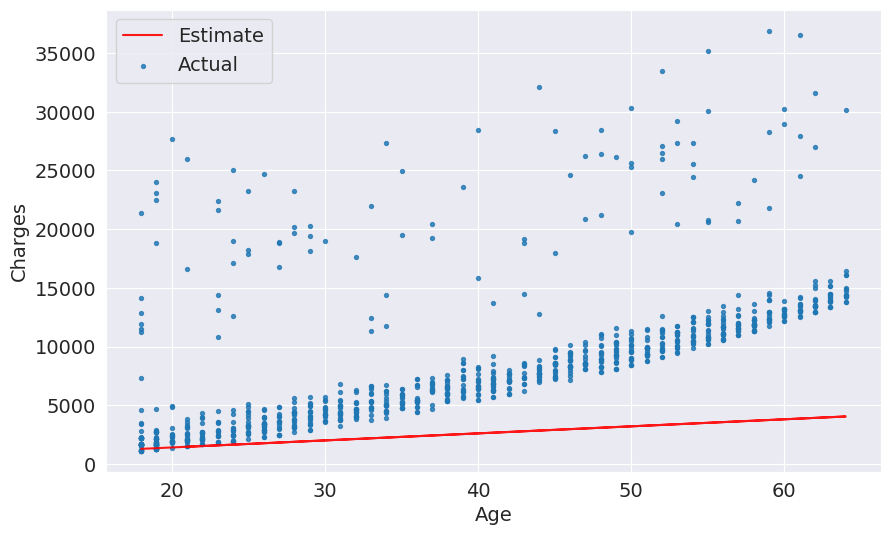

In [35]:
try_parameters(60,200)

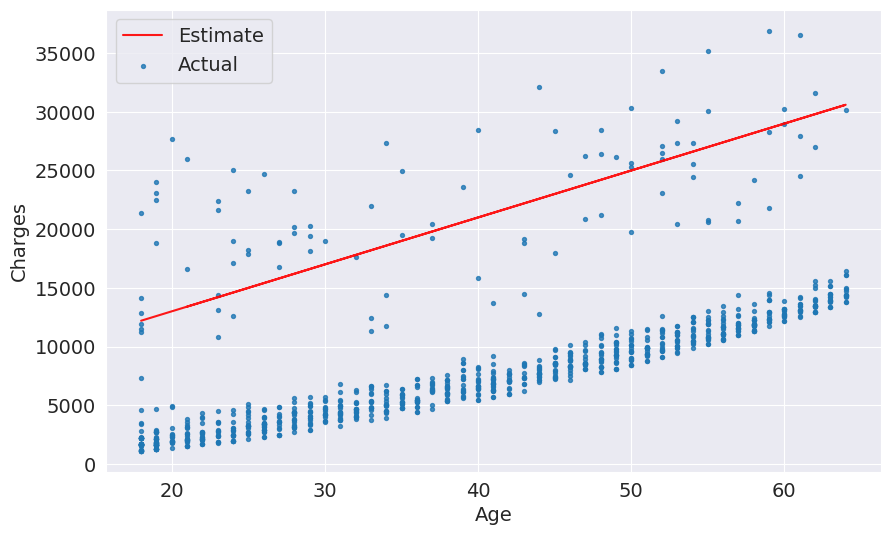

In [36]:
try_parameters(400, 5000)

In [37]:
targets = non_smoker_df.charges
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [38]:
predictions = estimated_charges
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [39]:
!pip install numpy --quiet

In [40]:
import numpy as np


In [41]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))


In [42]:
w =50
b = 100

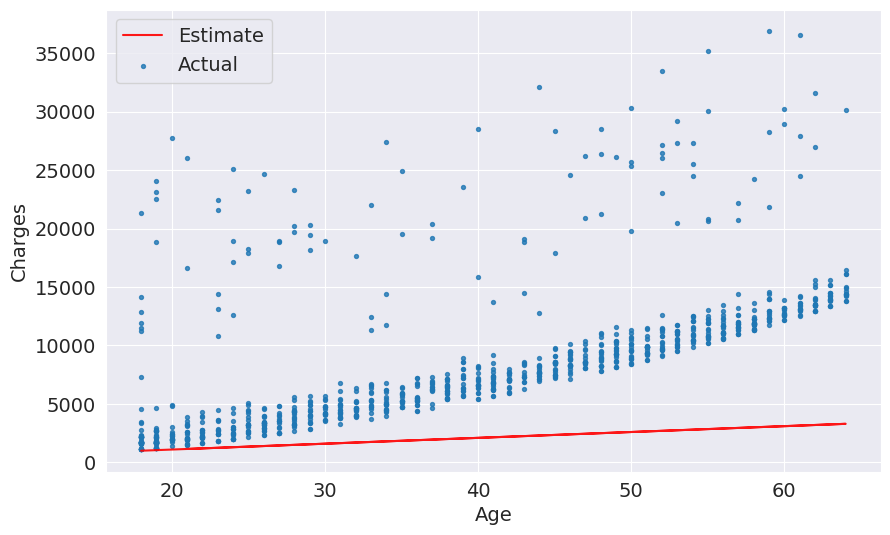

In [43]:
try_parameters(w,b)

In [44]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [45]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [46]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4991.993804156943


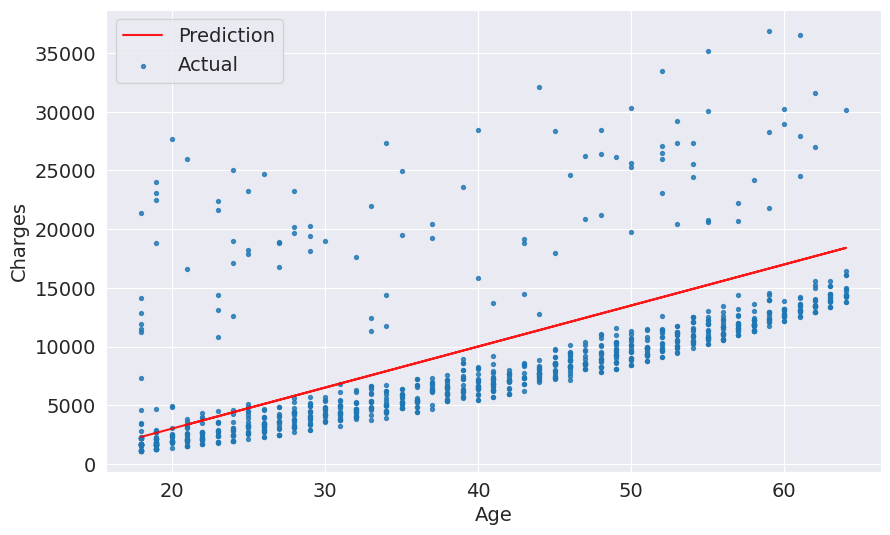

In [47]:
try_parameters(350, -4000)

Optimizers - Tweek the weights and the biases so the model can reduce the loss and make the line fit better.
There are:
1- Ordinary Least Square - This uses matrecices and their inverts to give ready weighs and biases to the model. This is good only for small data sets and will evantually end up using alot of memepory.
2- Stockastic Gradient Desent - Imagin your self on the hill, it is dark and you are trying to get doen , SGD tak step in each side (Weighs, biases) and moves.

In [48]:
# To implement these optimizers within the model we need sickit learn
!pip install scikit-learn --quiet
#scikit learn contains modules for duing ML with Python

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

In [51]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [52]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape:',inputs.shape)
print('targets.shape:', targets.shape)

inputs.shape: (1064, 1)
targets.shape: (1064,)


In [53]:
model.fit(inputs,targets)

LinearRegression()

In [54]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [55]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [56]:
rmse(targets, predictions)

np.float64(4662.505766636395)

The parameters of the model are stored in the coef_ and intercept_ properties.

In [57]:
# w
model.coef_

array([267.24891283])

In [58]:
# b
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss:  4662.505766636395


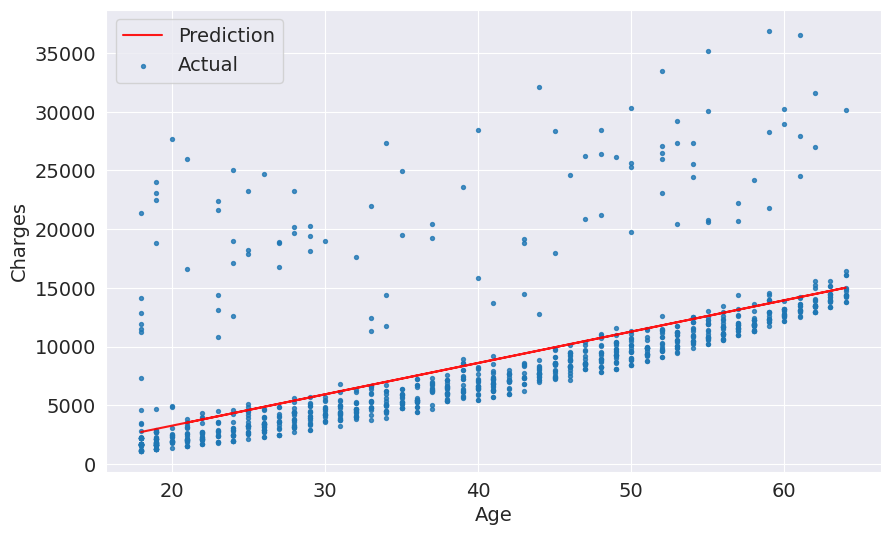

In [59]:
try_parameters(model.coef_, model.intercept_)

In [60]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


Linear Regression using Multiple Features

In [61]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [62]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


Using Categorical Features for Machine Learning
There are 3 ways to convert categorical columns into numbers

1- If categorical column has 2 categories (yes or no), this is called a binary category where you can replace the categories with 0 and 1.
2- If the categorical column has more than 2 cattegories we can perform on-hot-encoding - create new column for each category with 0 and 1.
3- If the categories have a natural order (e.g. cold, neutral, warm , hot) then they can be converted in numbers (e.g. 1,2,3,4) preserving the order, these are called ordinal.

Binary Categories

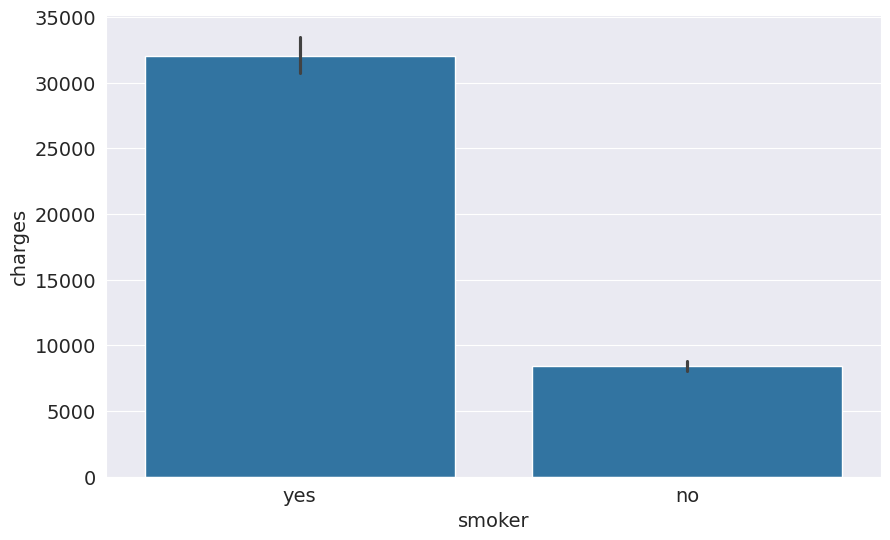

In [63]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [64]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [65]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [66]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [67]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

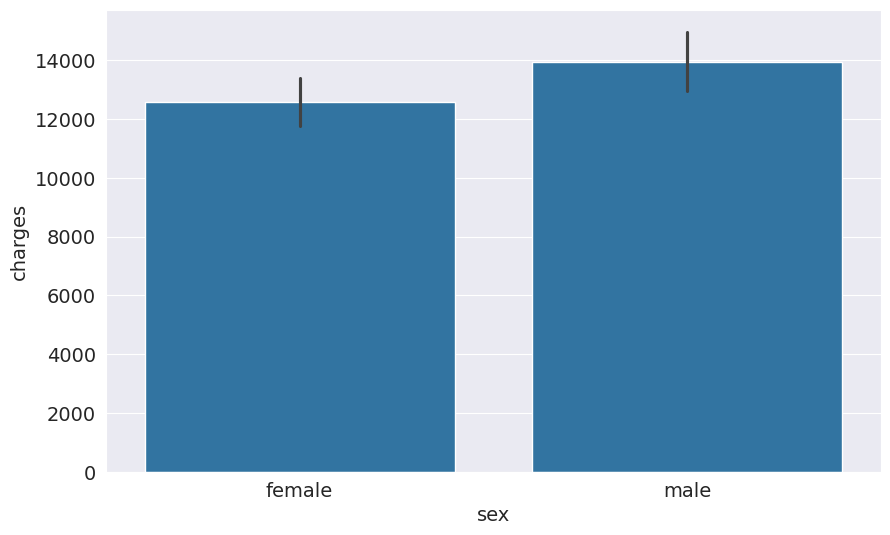

In [68]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [69]:
sex_codes = {'female': 0, 'male': 1}

In [70]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [71]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025484)

In [72]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


One Hot Encoding

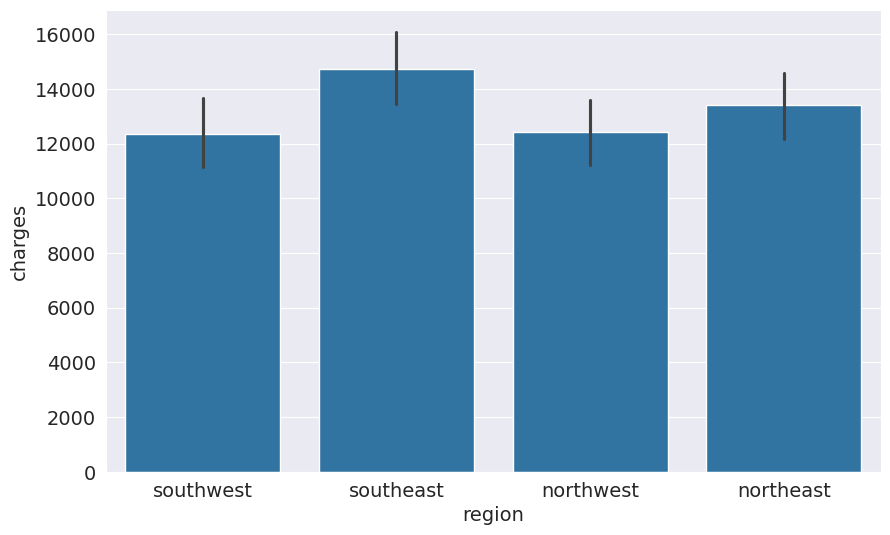

In [74]:
sns.barplot(medical_df, x = 'region', y = 'charges');

In [77]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [79]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [80]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [81]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [82]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


Feature Scaling

In [83]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [84]:
model.intercept_

np.float64(-12525.547811195444)

In [85]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [86]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [89]:
from sklearn.preprocessing import StandardScaler
numeric_col = ['age', 'bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_col])

StandardScaler()

In [90]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [91]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [92]:
scaled_inputs = scaler.transform(medical_df[numeric_col])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

Combimne the categorical data

In [93]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [94]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [96]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_col + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


Creating a Test Set

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,targets,test_size=0.1)



In [100]:
#Create and train model
model = LinearRegression().fit(inputs_train,targets_train)

#Generate predictions

predictions_test = model.predict(inputs_test)

#Compute loss to compare the model
loss = rmse(targets_test,predictions_test)
print('Test Loss:', loss)

Test Loss: 6306.343238855731


In [101]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6013.497342004723
